**#Asssignment 2**

In [266]:
## Import libraries
import pandas as  pd
import numpy as np

In [267]:
#3 Import the dataset 8K rows
df=pd.read_csv("/content/8k_diabetes_v2.csv")
df.head(5)

,diag_desc_combined,number_inpatient,medical_specialty,admission_source_id,num_lab_procedures,readmitted,distance_to_hospital,is_patient
0,NaN,0,Surgery-Neuro,Physician Referral,35,False,NaN,1
1,"First-degree perineal laceration, unspecified ...",0,?,Physician Referral,8,False,12.672400,1
2,Pneumococcal pneumonia [Streptococcus pneumoni...,1,Family/GeneralPractice,NaN,12,True,13.241222,1
3,Cellulitis and abscess of face; Streptococcus ...,0,?,Transfer from another health care facility,33,False,39.340022,1
4,"Bipolar I disorder, single manic episode, unsp...",0,Psychiatry,Emergency Room,31,False,25.601328,1


###**1. Perform Exploratory Data Analysis (EDA) and discuss the data and what you observe prior to beginning modeling and how impact how to proceed**

**Ans**: The data set has 7 columns and 8000k rows. There is 1 text column, `diag_desc_combined`, 3 catogerical columns `medical speciality` and `admission source id` and `readmitted` and 3 numerical columns `number_inpatient, num_lab_procedures,distance_to_hospital`. The column `readmitted` is the traget column that we are supposed to predict for the test dataset which is `another data set with 2K rows`. For the For both the test and train dataset we have to apply same pre processing method like cleaning texts columns, handling missing values.

In [268]:
print("The dimension of the train data set is",df.shape)

The dimension of the train data set is (8000, 8)


In [269]:
## Check the not null values in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diag_desc_combined    7534 non-null   object 
 1   number_inpatient      8000 non-null   int64  
 2   medical_specialty     8000 non-null   object 
 3   admission_source_id   7250 non-null   object 
 4   num_lab_procedures    8000 non-null   int64  
 5   readmitted            8000 non-null   bool   
 6   distance_to_hospital  7384 non-null   float64
 7   is_patient            8000 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 445.4+ KB


In [270]:
## Print the statistical values of numerical columns
df.describe()

,number_inpatient,num_lab_procedures,distance_to_hospital,is_patient
count,8000.000000,8000.000000,7384.000000,8000.0
mean,0.382125,43.098500,25.029571,1.0
std,0.841543,19.370266,14.498494,0.0
min,0.000000,1.000000,0.004441,1.0
25%,0.000000,32.000000,12.325162,1.0
50%,0.000000,44.000000,25.067822,1.0
75%,0.000000,57.000000,37.416795,1.0
max,9.000000,120.000000,49.982344,1.0


In [271]:
## Print the linera correlation of numerical columns
corrl=df.corr()
corrl

<ipython-input-271-0b5686c74e4a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrl=df.corr()


,number_inpatient,num_lab_procedures,readmitted,distance_to_hospital,is_patient
number_inpatient,1.000000,0.087106,0.192345,-0.003021,NaN
num_lab_procedures,0.087106,1.000000,0.081914,-0.011222,NaN
readmitted,0.192345,0.081914,1.000000,-0.004460,NaN
distance_to_hospital,-0.003021,-0.011222,-0.004460,1.000000,NaN
is_patient,NaN,NaN,NaN,NaN,NaN


In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

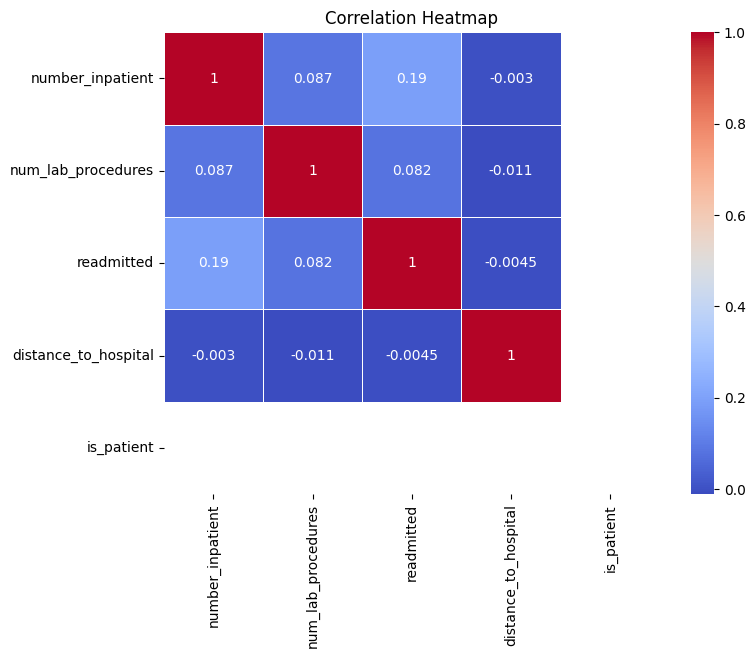

In [273]:
# Create a heatmap for columns correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corrl, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

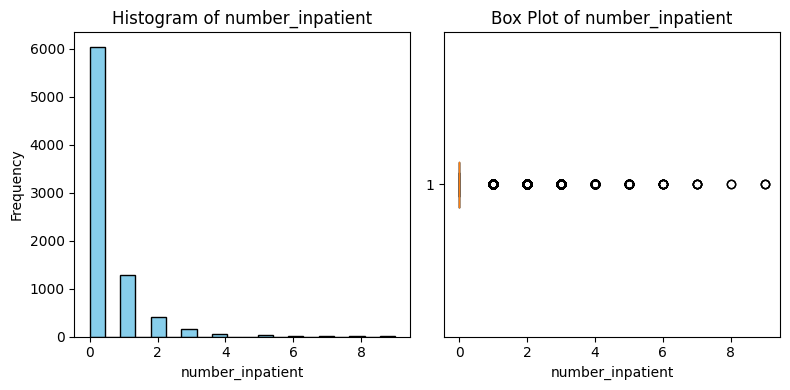

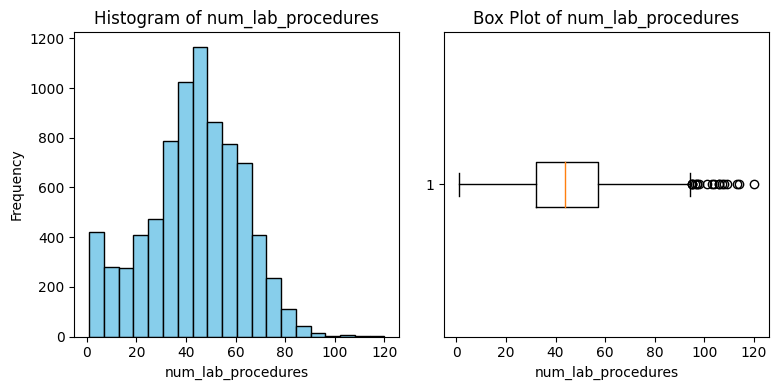

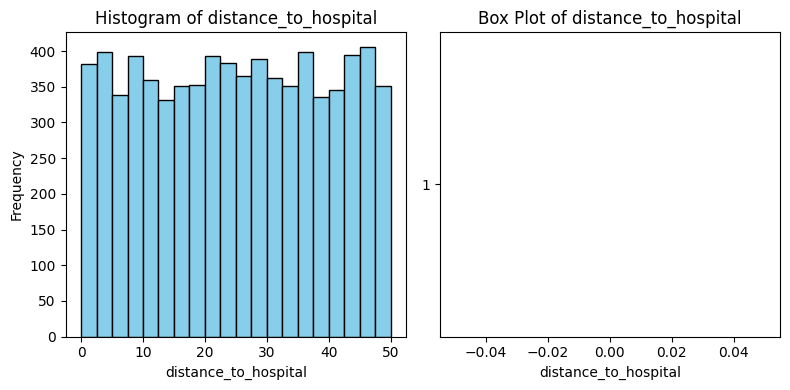

In [274]:
## creating a list of numerical columns to plot the histpogram and box plot
numerical_df = df[["number_inpatient",	"num_lab_procedures","distance_to_hospital"]]
# Create simple histograms for numerical columns
for col in numerical_df:
    plt.figure(figsize=(8, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    plt.boxplot(numerical_df[col], vert=False)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

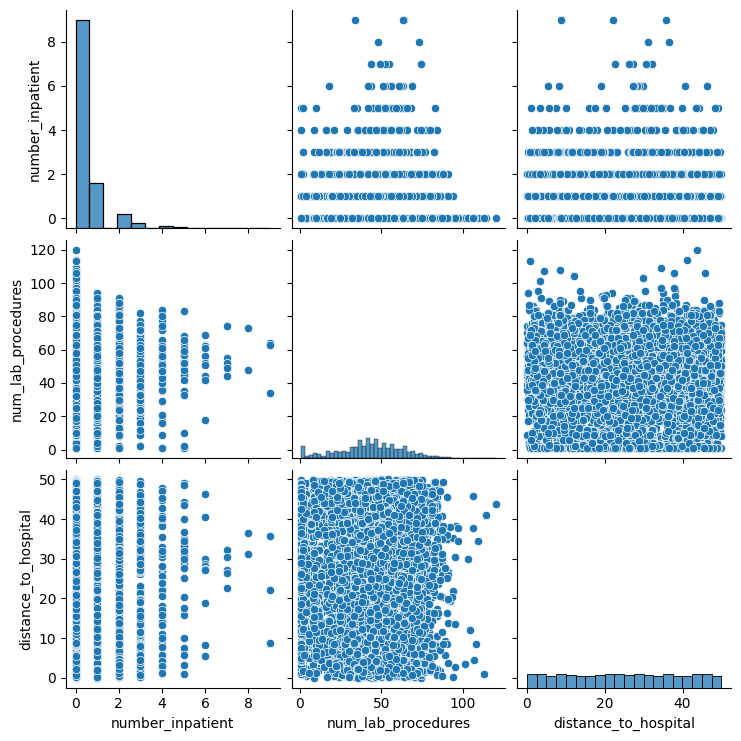

In [275]:
sns.pairplot(numerical_df)
plt.show()

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diag_desc_combined    7534 non-null   object 
 1   number_inpatient      8000 non-null   int64  
 2   medical_specialty     8000 non-null   object 
 3   admission_source_id   7250 non-null   object 
 4   num_lab_procedures    8000 non-null   int64  
 5   readmitted            8000 non-null   bool   
 6   distance_to_hospital  7384 non-null   float64
 7   is_patient            8000 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 445.4+ KB


## Answering question number 2 and 3 together as these includes same process.

**2.Pre-processed categorical data for use in the model and justified pre-processing
method. Note this may be different for each algorithm you try.**

**3. Pre-processed numerical data appropriately including handling missing data and
justified methods used. Note this may be different for each algorithm you try**

Since, we have 4 numerical columns and one of these columns `distance_to_hospital` has NaN values. For catogerical columns we have `admission_source_id`with missing values and finally the text column also has missing values NaN. We will approach following pre-processing methods:

1. Drop the `is_patient` column as it has a single feature `1` for all the columns, which doesnot adds up any values or additional info about relation or dependency.

2. `distance_to_hospital` has NaN values. Filling the missing values with mean distance  using `df["distance_to_hospital"].mean()` to handle missing distances.

3. `admission_source_id` is a catogerical column which has missing values as `NaN` and there are some features like `not mapped and not available`. The best way to handle this will be to give numerical labels to each features of `admission_source_id`,

4. `Medical Speciality` has feature `?` for some rows. The best way to handle this will be replacing all the features with numerical labels.

5. Finally, the text column `diag_desc_combined` is also missing some rows and has `NaN` values. So, replacing NaN with label `Not Given` which makes `Not Given` as feature for missing values.



After handling missing values for all the columns like `numerical, catogerical and text` we will do `data cleanin`g for `text column` using various functions like converting the `text column to string`, `removing stop words, removing special characters, lowering the upper case letters` and than finally the text column is ready for furthur steps.



###**Note**
Initally tries with one hot encoding for catogerical values to handle missing valeus and all but the model was creating problem which testing the test dataset 2K rows which is missing several features of some columns. SO, gone with above pre processing steps.

In [277]:
## display the columns of train data set
df.columns

Index(['diag_desc_combined', 'number_inpatient', 'medical_specialty',
       'admission_source_id', 'num_lab_procedures', 'readmitted',
       'distance_to_hospital', 'is_patient'],
      dtype='object')

In [278]:
## check features of readmitted column
df["readmitted"].unique()

array([False,  True])

In [279]:
## check features of admission column
df["admission_source_id"].unique()

array(['Physician Referral', nan,
       'Transfer from another health care facility', 'Emergency Room',
       'Transfer from a Skilled Nursing Facility (SNF)',
       'Transfer from a hospital', 'Not Mapped', 'Clinic Referral',
       'HMO Referral', 'Not Available', 'Court/Law Enforcement'],
      dtype=object)

In [280]:
## check features of medical  column
df["medical_specialty"].unique()

array(['Surgery-Neuro', '?', 'Family/GeneralPractice', 'Psychiatry',
       'Cardiology', 'InternalMedicine',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Emergency/Trauma', 'Gastroenterology', 'Orthopedics',
       'Cardiology-Pediatric', 'PhysicalMedicineandRehabilitation',
       'Gynecology', 'Pulmonology', 'Surgery-General', 'Pediatrics',
       'Orthopedics-Reconstructive', 'Surgery-Pediatric',
       'Otolaryngology', 'Pediatrics-CriticalCare', 'Hematology/Oncology',
       'ObstetricsandGynecology', 'Pediatrics-Endocrinology',
       'Surgery-Vascular', 'Urology', 'Neurology', 'Radiologist',
       'Osteopath', 'Surgery-Cardiovascular', 'Psychology', 'Oncology',
       'Endocrinology', 'OutreachServices', 'Podiatry', 'Ophthalmology',
       'Hospitalist', 'Radiology', 'Obsterics&Gynecology-GynecologicOnco',
       'Surgery-Thoracic', 'Surgeon', 'Pathology', 'Surgery-Plastic',
       'InfectiousDiseases', 'Anesthesiology-Pediatric',
       'Pediatrics-Pulmonol

In [281]:
## Step1
## Drop the is patient column
df.drop("is_patient", axis=1, inplace=True)

In [282]:
## Step2
## Replacing the Nan values of distances with mean distance
df["distance_to_hospital"]= df["distance_to_hospital"].fillna(df["distance_to_hospital"].mean())

In [283]:
## Step3
## Replacing the features of admission column with numerical label like 1,2,3......
df["admission_source_id"], _ = pd.factorize(df["admission_source_id"])
df["admission_source_id"] = df["admission_source_id"] +1

In [284]:
## Step4
## Replacing the features of medical speciality column with numerical label like 1,2,3......52
df["medical_specialty"], _ = pd.factorize(df["medical_specialty"])
df["medical_specialty"]  = df["medical_specialty"] +1

In [285]:
## Step5
## Replacing the NaN values of text column with new label Not Given to handle any nan value issue druing modeling
df["diag_desc_combined"].fillna("Not Given", inplace=True)

In [286]:
##Converting the dataset's text column into string type.
df["diag_desc_combined"] = df["diag_desc_combined"].astype(str)

In [287]:
### importing the necessary libraries for data cleaning process
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [288]:
## Removing the common punctuations
def remove_punc(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for i in string:
        if i in punc:
            string = string.replace(i,"")
    return string
df["diag_desc_combined"] = df["diag_desc_combined"].apply(remove_punc)

In [289]:
## Removing the stop words
def stop_word(string):
    stop_words = set(stopwords.words('english'))
    word=word_tokenize(string)
    sentence=[]
    for word in word:
        if word not in stop_words:
            sentence.append(word)
    return " ".join(sentence)
df["diag_desc_combined"] = df["diag_desc_combined"].apply(stop_word)

In [290]:
from tkinter import Text
##Converting the contents to lower case
def lower(string):
    return string.lower()
df["diag_desc_combined"] = df["diag_desc_combined"].apply(lower)

In [291]:
## Display the final dataset after pre processing and cleaning
df.head(5)




,diag_desc_combined,number_inpatient,medical_specialty,admission_source_id,num_lab_procedures,readmitted,distance_to_hospital
0,not given,0,1,1,35,False,25.029571
1,firstdegree perineal laceration unspecified ep...,0,2,1,8,False,12.672400
2,pneumococcal pneumonia streptococcus pneumonia...,1,3,0,12,True,13.241222
3,cellulitis abscess face streptococcus infectio...,0,2,2,33,False,39.340022
4,bipolar i disorder single manic episode unspec...,0,4,3,31,False,25.601328


In [292]:
df["medical_specialty"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

In [293]:
df["admission_source_id"].unique()

array([ 1,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10])

**##4. Implement a model to make predictions using text data using tf-idf**

Ans:For the prediction using text tf-idf we are using lasso logistic model to predict and combined it back to the dataset for training and testing purpose.

In [294]:
## SPlit the training dataset to train and test set
from sklearn.model_selection import train_test_split
X= df.drop("readmitted", axis=1)
y=df["readmitted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [295]:
## display the dimension
X_train.shape, y_train.shape

((7200, 6), (7200,))

In [296]:
X_test.shape, y_test.shape

((800, 6), (800,))

In [297]:
## Vectorized the text column with TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_text = tfidf.fit_transform(X_train["diag_desc_combined"])
X_train_text

<7200x1024 sparse matrix of type '<class 'numpy.float64'>'
	with 89148 stored elements in Compressed Sparse Row format>

In [298]:

## Convert the sparse matrix to a DataFrame
X_train_df = pd.DataFrame(X_train_text.toarray(), columns=tfidf.get_feature_names_out())

In [299]:
## Install upgrade xgb boost
!pip install --upgrade xgboost

In [300]:
## Install all the necessary libraries for all the models we will use
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_predict
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier


In [301]:
# Initialize the models for text prediction
lasso_logistic = LogisticRegression()


In [302]:
## Cross validating the lasso logistic
y_pred_train_text_lasso = cross_val_predict(lasso_logistic, X_train_df, y_train, method='predict_proba')

In [303]:
##y_pred_train_text_lasso = cross_val_predict(lasso_logistic, X_train_df, y_train, method='predict_proba')
##y_pred_train_text_random_forest = cross_val_predict(random_forest,X_train_df, y_train, method='predict_proba')
##y_pred_train_text_xgb = cross_val_predict(xgb_classifier, X_train_df, y_train, method='predict_proba')
##y_pred_train_text_decision = cross_val_predict(decision_tree, X_train_df, y_train, method='predict_proba')
##y_pred_train_text_knn = cross_val_predict(knn,X_train_df, y_train, method='predict_proba')
##y_pred_train_text_gbm = cross_val_predict(gbm_classifier, X_train_df, y_train, method='predict_proba')
##y_pred_train_text_extra = cross_val_predict(extra_trees_classifier, X_train_df, y_train, method='predict_proba')
##y_pred_train_text_lgbm = cross_val_predict(lgbm_classifier,X_train_df, y_train, method='predict_proba')


**Solving together**


**##5. Use model stacking to incorporate tf-idf predictions for the text field
(diag_desc_combined) in the downstream algorithm**

**##6. Perform experimentation for multiple modeling algorithms and justify why you
selected the experiments you chose**

Ans:
NOw model stacking the y_pred values of text columns into the X_train data set for furthur processing.

In [304]:
#3 MOdel stacking the lasso logistic prediction  to the X_train dataset for thr doenstream algorithm models
X_train_combined_lasso = np.column_stack((X_train.drop('diag_desc_combined', axis=1), y_pred_train_text_lasso))

In [305]:
##X_train_combined_random_forest = np.column_stack((X_train.drop('diag_desc_combined', axis=1), y_pred_train_text_random_forest))
##X_train_combined_xgb = np.column_stack((X_train.drop('diag_desc_combined', axis=1), y_pred_train_text_xgb))
##X_train_combined_lgbm = np.column_stack((X_train.drop('diag_desc_combined', axis=1), y_pred_train_text_lgbm))
##X_train_combined_extra_trees = np.column_stack((X_train.drop('diag_desc_combined', axis=1), y_pred_train_text_extra))
##X_train_combined_gbm = np.column_stack((X_train.drop('diag_desc_combined', axis=1), y_pred_train_text_gbm))
##X_train_combined_decision_tree = np.column_stack((X_train.drop('diag_desc_combined', axis=1), y_pred_train_text_decision))
##X_train_combined_knn = np.column_stack((X_train.drop('diag_desc_combined', axis=1), y_pred_train_text_knn))


#### Ans for 6)
 We have selected 8 models to experiment with the above satcked model to see which one performs better in the end. I choosed these models to see how diffferent models acts with the given dataset and how different models produces the results. This expereiment will help me understands that a data set is not suitable for all types of models , different models performs better with specific types of dataset. This will provide me an insight for future to apply models that best suits the datasets requirement.

In [306]:
## Initialliziing the models that we are experimenting
random_forest = RandomForestClassifier()
xgb_classifier = xgb.XGBClassifier()
gbm_classifier = GradientBoostingClassifier()
lgbm_classifier = LGBMClassifier()
extra_trees_classifier = ExtraTreesClassifier()
svc_classifier = SVC(probability=True)
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()

In [307]:
 ##Fit each model with its corresponding modified feature set
lasso_logistic.fit(X_train_combined_lasso, y_train)
random_forest.fit(X_train_combined_lasso, y_train)
xgb_classifier.fit(X_train_combined_lasso, y_train)
lgbm_classifier.fit(X_train_combined_lasso, y_train)
extra_trees_classifier.fit(X_train_combined_lasso, y_train)
gbm_classifier.fit(X_train_combined_lasso, y_train)
decision_tree.fit(X_train_combined_lasso, y_train)
knn.fit(X_train_combined_lasso, y_train)
svc_classifier.fit(X_train_combined_lasso, y_train)



[LightGBM] [Info] Number of positive: 2869, number of negative: 4331
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.398472 -> initscore=-0.411835
[LightGBM] [Info] Start training from score -0.411835


SVC(probability=True)

Now we have our model, but we don't have a lasso_logistic estimated actually so we don't have a way to make predictions on new data

In [308]:
## fitting the text dataframe and y_train into lasso
lasso_logistic.fit( X_train_df,y_train)


LogisticRegression()

#### Testing the 8K dataset to evaluate the AUC for the best model. We have splitted the dataset into train and test because our final dataset doesnot have y_predictd values which ,makes it impossible to calculate the AUC and other values.

In [309]:
## Test part

In [310]:
# TF-IDF transform for test data
X_test_text = tfidf.transform(X_test["diag_desc_combined"])
X_test_text.shape

(800, 1024)

In [311]:
## implementing the lasso for text prediction and model stacking with the predicted y values to ther main model to perfom experiment
## with other models
y_test_pred_text_lasso = lasso_logistic.predict_proba(X_test_text)
## Model stacking
X_test_combined_lasso = np.column_stack((X_test.drop('diag_desc_combined', axis=1), y_test_pred_text_lasso))
X_test_combined_lasso.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(800, 7)

#### Now predicting the AUC value for all 8 models we choosed for experiment one by one

In [312]:

## Model 1
y_test_pred_final1= random_forest.predict_proba(X_test_combined_lasso)
auc_random_forest = roc_auc_score(y_test, y_test_pred_final1[:, 1])
auc_random_forest

0.6313711532504169

In [313]:
## MOdel 2
y_test_pred_final2= xgb_classifier.predict_proba(X_test_combined_lasso)
auc_xgb = roc_auc_score(y_test, y_test_pred_final2[:, 1])
auc_xgb

0.650037239897442

In [314]:
## MOdel 3
y_test_pred_final3= lgbm_classifier.predict_proba(X_test_combined_lasso)
auc_lgbm = roc_auc_score(y_test, y_test_pred_final3[:, 1])
auc_lgbm

0.6878571569809977

In [315]:
## MOdel 4
y_test_pred_final4= gbm_classifier.predict_proba(X_test_combined_lasso)
auc_gbm = roc_auc_score(y_test, y_test_pred_final4[:, 1])
auc_gbm

0.7022159386761052

In [316]:
## MOdel 5
y_test_pred_final5= extra_trees_classifier.predict_proba(X_test_combined_lasso)
auc_extra_tree= roc_auc_score(y_test, y_test_pred_final5[:, 1])
auc_extra_tree

0.6172924946776607

In [317]:
## MOdel 6
y_test_pred_final6= svc_classifier.predict_proba(X_test_combined_lasso)
auc_svc = roc_auc_score(y_test, y_test_pred_final6[:, 1])
auc_svc

0.6470316835729211

In [318]:
## MOdel 7
y_test_pred_final7= decision_tree.predict_proba(X_test_combined_lasso)
auc_dt = roc_auc_score(y_test, y_test_pred_final7[:, 1])
auc_dt

0.5501288566362815

In [319]:
## MOdel 8
y_test_pred_final8= knn.predict_proba(X_test_combined_lasso)
auc_knn = roc_auc_score(y_test, y_test_pred_final8[:, 1])
auc_knn

0.5060144082151873

**7. Final model selection and discussion of your model choice and the model weaknesses
(generally, where model doesn’t perform well, etc.)**

The several models performed nicely since, the AUC below .5 is not good and auc above .5 starts making sense about the model performance. All the model in this experiment produced AUC above 0.5.

AUC < 0.5: The model's performance is poor, and it is classifying the classes incorrectly. This is a "bad" model.

AUC = 0.5: The model's performance is random, and it is as good as guessing. This is considered a "bad" model.

0.5 < AUC < 1: The model's performance is better than random guessing, and the closer AUC is to 1, the better the model is at distinguishing between classes. This is considered "good" or "excellent" performance.

Abstract:

Considering above statements our models stands above 0.5 which means it is not a bad model but still all are not a good model.
The best model from this experiment stands out to be Gradient Booosting Model which has AUC of .70, which is good model among all the 8. It has good ability of distinguishing between between classes of readmitted which are True or False.

 The second model that performed nicely and went over .67 of AUC requirment is lgbm which has 0.688.
 Both these model fullfill the AUC cut off required for this Assignment.
 The worst model for this experiment is knn which has AUC of obly 0.506.

 Though GBM an d LGBM performed well among 8 models, still these models have some weakness it indicate that the model's ability to distinguish between the true and false classes is not very strong. This means there is room for improvement in terms of discrimination. Also the data is imbalanced which  also affected the performance, I tried to generate random sample using smote
 but theminority class samples were getting higher than the majority value classes and causing the errors.

 NOte: Tried random sampling which increased mine AUC from .7 t0 .77 for random forest, lgbm and, xgb and gbm but is not sure if it is over fitting or not. so, just choosed not to use it

### PLotting the AUC curve for the best model

In [320]:
import matplotlib.pyplot as plt

In [321]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_final4[:, 1])
roc_auc = auc(fpr, tpr)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_test_pred_final3[:, 1])
roc_auc1 = auc(fpr1, tpr1)


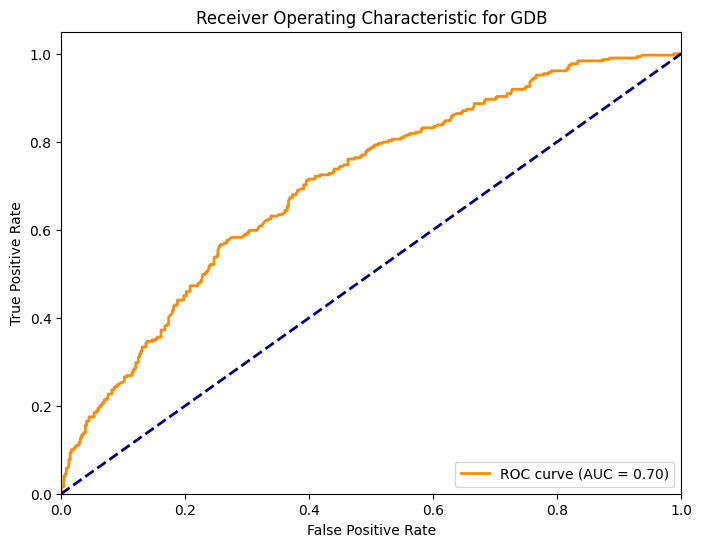

In [322]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for GDB')
plt.legend(loc='lower right')
plt.show()

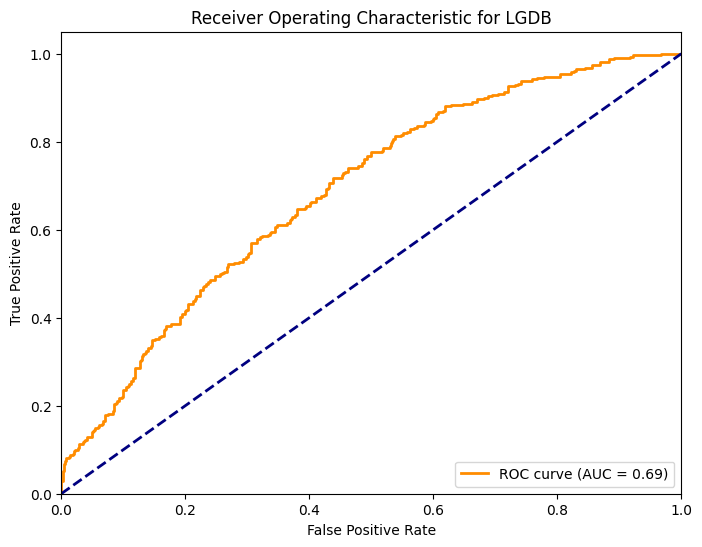

In [323]:
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LGDB')
plt.legend(loc='lower right')
plt.show()

#**Now, Using our test dataset which is 2k rows with out y_labels**

In [324]:
##Test set
df1=pd.read_csv("/content/2k_diabetes_v2_scoring.csv")
df_test=df1
df_test.head(1)

,diag_desc_combined,number_inpatient,medical_specialty,admission_source_id,num_lab_procedures,distance_to_hospital,is_patient
0,NaN,0,?,Physician Referral,1,NaN,1


In [325]:
df_test.shape

(2000, 7)

In [326]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diag_desc_combined    1896 non-null   object 
 1   number_inpatient      2000 non-null   int64  
 2   medical_specialty     2000 non-null   object 
 3   admission_source_id   1814 non-null   object 
 4   num_lab_procedures    2000 non-null   int64  
 5   distance_to_hospital  1846 non-null   float64
 6   is_patient            2000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 109.5+ KB


In [327]:
df_test.describe()

,number_inpatient,num_lab_procedures,distance_to_hospital,is_patient
count,2000.000000,2000.000000,1846.000000,2000.0
mean,0.408000,42.999000,25.148971,1.0
std,0.903296,19.786732,14.356166,0.0
min,0.000000,1.000000,0.039542,1.0
25%,0.000000,31.000000,12.575656,1.0
50%,0.000000,43.000000,25.174831,1.0
75%,1.000000,57.000000,37.569857,1.0
max,10.000000,101.000000,49.991587,1.0


**2.Pre-processed categorical data for use in the model and justified pre-processing
method. Note this may be different for each algorithm you try.**

Since, we have 3 numerical columns and one of these columns `distance_to_hospital` has NaN values. For catogerical columns we have `admission_source_id`with missing values and finally the text column also has missing values NaN.
1. Take mean for the missing values in distnce
2.

In [328]:
## data cleaning
### importing the necessary libraries for data cleaning process
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [329]:
df_test.columns

Index(['diag_desc_combined', 'number_inpatient', 'medical_specialty',
       'admission_source_id', 'num_lab_procedures', 'distance_to_hospital',
       'is_patient'],
      dtype='object')

In [330]:
df_test["admission_source_id"].unique()

array(['Physician Referral', nan, 'Transfer from a hospital',
       'Emergency Room', 'Transfer from another health care facility',
       'Transfer from a Skilled Nursing Facility (SNF)',
       'Clinic Referral', 'Not Mapped', 'Not Available', 'HMO Referral'],
      dtype=object)

In [331]:
df_test["diag_desc_combined"].fillna("Not Given", inplace=True)

In [332]:
##Converting the dataset's text column into string type.
df_test["diag_desc_combined"] = df1["diag_desc_combined"].astype(str)

In [333]:
## Removing the common punctuations
def remove_punc(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for i in string:
        if i in punc:
            string = string.replace(i,"")
    return string
df_test["diag_desc_combined"] = df_test["diag_desc_combined"].apply(remove_punc)

In [334]:
## Removing the stop words
def stop_word(string):
    stop_words = set(stopwords.words('english'))
    word=word_tokenize(string)
    sentence=[]
    for word in word:
        if word not in stop_words:
            sentence.append(word)
    return " ".join(sentence)
df_test["diag_desc_combined"] = df_test["diag_desc_combined"].apply(stop_word)

In [335]:
from tkinter import Text
##Converting the contents to lower case
def lower(string):
    return string.lower()
df_test["diag_desc_combined"] = df_test["diag_desc_combined"].apply(lower)

In [336]:
## Handling missing values
df_test["diag_desc_combined"].fillna("Not Given", inplace=True)

df_test["medical_specialty"], _ = pd.factorize(df_test["medical_specialty"])
df_test["medical_specialty"]  = df_test["medical_specialty"] +1

df_test["admission_source_id"], _ = pd.factorize(df_test["admission_source_id"])
df_test["admission_source_id"] = df_test["admission_source_id"] +1

df_test["admission_source_id"].fillna("Not Given", inplace=True)

df_test["distance_to_hospital"]= df_test["distance_to_hospital"].fillna(df_test["distance_to_hospital"].mean())

df_test.drop("is_patient", axis=1, inplace=True)

df_test.head(5)




,diag_desc_combined,number_inpatient,medical_specialty,admission_source_id,num_lab_procedures,distance_to_hospital
0,not given,0,1,1,1,25.148971
1,congestive heart failure unspecified postmyoca...,1,2,0,21,44.624155
2,extrinsic asthma unspecified malignant essenti...,0,1,1,37,36.973727
3,femoral hernia obstruction unilateral unspecif...,0,3,2,32,9.056670
4,cerebral thrombosis without mention cerebral i...,0,4,3,37,29.288170


In [337]:
df_test["medical_specialty"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [338]:
df_test["admission_source_id"].unique()

array([1, 0, 2, 3, 4, 5, 6, 7, 8, 9])

In [339]:
# TF-IDF transform for test data
X_test_text1 = tfidf.transform(df_test["diag_desc_combined"])
X_test_text1.shape

(2000, 1024)

In [340]:
y_test_pred_text_lasso1 = lasso_logistic.predict_proba(X_test_text1)
X_test_combined_lasso1 = np.column_stack((df_test.drop('diag_desc_combined', axis=1), y_test_pred_text_lasso1))
X_test_combined_lasso1.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(2000, 7)

In [341]:
y_test_pred_final11= random_forest.predict_proba(X_test_combined_lasso1)
y_test_pred_final11


array([[0.86, 0.14],
       [0.46, 0.54],
       [0.84, 0.16],
       ...,
       [0.57, 0.43],
       [0.36, 0.64],
       [0.4 , 0.6 ]])

In [342]:
y_test_pred_final12= xgb_classifier.predict_proba(X_test_combined_lasso1)
y_test_pred_final12

array([[0.947016  , 0.05298401],
       [0.44617552, 0.5538245 ],
       [0.9340155 , 0.06598447],
       ...,
       [0.77199256, 0.22800744],
       [0.3507396 , 0.6492604 ],
       [0.4355675 , 0.5644325 ]], dtype=float32)

In [343]:
y_test_pred_final13= lgbm_classifier.predict_proba(X_test_combined_lasso1)
y_test_pred_final13

array([[0.92283822, 0.07716178],
       [0.32888876, 0.67111124],
       [0.88449057, 0.11550943],
       ...,
       [0.62591181, 0.37408819],
       [0.4822993 , 0.5177007 ],
       [0.3957845 , 0.6042155 ]])

In [344]:
y_test_pred_final14= gbm_classifier.predict_proba(X_test_combined_lasso1)
y_test_pred_final14

array([[0.84874432, 0.15125568],
       [0.48563922, 0.51436078],
       [0.75670866, 0.24329134],
       ...,
       [0.50758572, 0.49241428],
       [0.34160974, 0.65839026],
       [0.51040651, 0.48959349]])

In [345]:
y_test_pred_final15= extra_trees_classifier.predict_proba(X_test_combined_lasso1)
y_test_pred_final15

array([[0.92, 0.08],
       [0.52, 0.48],
       [0.8 , 0.2 ],
       ...,
       [0.61, 0.39],
       [0.32, 0.68],
       [0.46, 0.54]])

In [346]:
y_test_pred_final16= lgbm_classifier.predict_proba(X_test_combined_lasso1)
y_test_pred_final16

array([[0.92283822, 0.07716178],
       [0.32888876, 0.67111124],
       [0.88449057, 0.11550943],
       ...,
       [0.62591181, 0.37408819],
       [0.4822993 , 0.5177007 ],
       [0.3957845 , 0.6042155 ]])

In [347]:
y_test_pred_final17= decision_tree.predict_proba(X_test_combined_lasso1)
y_test_pred_final17

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [348]:
y_test_pred_final18= knn.predict_proba(X_test_combined_lasso1)
y_test_pred_final18

array([[0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       ...,
       [0.6, 0.4],
       [0.2, 0.8],
       [0.4, 0.6]])

In [349]:
len(y_test_pred_final18)

2000

**To create a new dataset pred2.csv lets, take y_pred from GBM, we can also take from LGBM , but lets go with GBM.**

In [350]:
# Convert the NumPy array to a DataFrame with one column
y_pred_df1 = pd.DataFrame(y_test_pred_final14)
y_pred_df11=y_pred_df1.drop(0, axis=1)
y_pred_df11


,1
0,0.151256
1,0.514361
2,0.243291
3,0.305429
4,0.319556
...,...
1995,0.232958
1996,0.490002
1997,0.492414
1998,0.658390


In [351]:
combined_data_test1 = pd.concat([df1, y_pred_df11], axis=1)
combined_data_test1.head(10)

,diag_desc_combined,number_inpatient,medical_specialty,admission_source_id,num_lab_procedures,distance_to_hospital,1
0,not given,0,1,1,1,25.148971,0.151256
1,congestive heart failure unspecified postmyoca...,1,2,0,21,44.624155,0.514361
2,extrinsic asthma unspecified malignant essenti...,0,1,1,37,36.973727,0.243291
3,femoral hernia obstruction unilateral unspecif...,0,3,2,32,9.056670,0.305429
4,cerebral thrombosis without mention cerebral i...,0,4,3,37,29.288170,0.319556
5,paroxysmal supraventricular tachycardia urinar...,0,1,1,72,27.073309,0.521121
6,coronary atherosclerosis unspecified type vess...,0,1,1,9,22.522278,0.194040
7,streptococcal septicemia pneumonitis due inhal...,0,1,0,18,43.912214,0.178460
8,achlorhydria mechanical complication unspecifi...,0,1,3,26,44.906301,0.384084
9,mechanical complication unspecified cardiac de...,1,5,0,69,0.573923,0.712179


In [352]:
## Download the csv file to collab with predicted values.
combined_data_test1.to_csv('Ghimire_Sagar_Pred2.csv', index=True)
